# Đồ Án Cuối Kỳ

## Môi trường code

In [1]:
import sys
sys.executable

'/home/uyen_trang/miniconda3/envs/min_ds-env/bin/python'

## Import các thư viện cần thiết

In [2]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

## Thu thập dữ liệu

Dữ liệu được thu thập trên Kaggle

## Khám phá dữ liệu

## Đọc dữ liệu từ file csv

In [3]:
df = pd.read_csv('data.csv')
df.head()

Uniq Id            Crawl Timestamp  \
0  eb49cc038190f6f03c272f79fbbce894  2019-10-30 11:38:11 +0000   
1  1657cc30c438affede6a5060d6847363  2019-10-31 15:46:54 +0000   
2  41654633cce38c8650690f6dbac01fd3  2019-10-30 09:53:23 +0000   
3  08b1bd85c3efc2d7aa556fd79b073382  2019-10-29 16:16:52 +0000   
4  3ac3f213732512d1d11bb73ab3b1900f  2019-10-31 09:32:06 +0000   

                  Category                                      Product Title  \
0                Skin Care   Lee posh Lactic Acid 60% Anti ageing Pigmenta...   
1                Skin Care   Branded SLB Works New 1.5mm Titanium 1200 nee...   
2                Skin Care   Generic 1 Pc brand snail eye cream remove dar...   
3                Skin Care   Generic Anti Snoring Snore Stopper Sleep Apne...   
4  Grocery & Gourmet Foods   Harveys Crunchy & Creame Gourmet Delicacies C...   

                                 Product Description      Brand  \
0  PROFESSIONAL GRADE Face Peel: this peel stimul...   Lee Posh   
1  Item name: 1.5mm titanium 1200 needles microne...  SLB Works   
2  Use: eye, item type: cream, net wt: 20g, gzzz:...    Generic   
3  Prevent the tongue from dropping backward or b...    Generic   
4     Harvey's wafer Cream Wafer 110g. Made in India    Harveys   

  Pack Size Or Quantity      Mrp    Price  Site Name  Offers Combo Offers  \
0                   NaN  2000.00   799.00  Amazon In  60.05%          NaN   
1                   NaN  2040.00  2040.00  Amazon In      0%          NaN   
2                   NaN  1824.00  1042.00  Amazon In  42.87%          NaN   
3                   NaN  2185.00  1399.00  Amazon In  35.97%          NaN   
4                   NaN   594.00   570.00  Amazon In   4.04%          NaN   

  Stock Availibility Product Asin  \
0                YES   B072BGHNJ1   
1                YES   B07QDTZYSJ   
2                YES   B07DCSN8MP   
3                YES   B07GLW9VQN   
4                YES   B07NFYYLF1   

                                          Image Urls  
0  https://images-na.ssl-images-amazon.com/images...  
1  https://images-na.ssl-images-amazon.com/images...  
2  https://images-na.ssl-images-amazon.com/images...  
3  https://images-na.ssl-images-amazon.com/images...  
4  https://images-na.ssl-images-amazon.com/images...

### Dữ liệu có bao nhiêu dòng và cột?

In [4]:
num_rows = len(df)
num_cols = len(df.columns)
num_rows, num_cols

(30000, 15)

### Ý nghĩa của mỗi dòng. Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng cho biết thông tin của một sản phẩm

### Dữ liệu có các dòng bị lặp không?

Ta sử dụng phương thức `duplicated` của dataframe để kiểm tra và lưu vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và ngược lại thì là False

In [5]:
have_duplicated_rows = df.duplicated().any()
have_duplicated_rows

False

### Ý nghĩa của mỗi cột

- **Uniq Id**: ID của sản phẩm            
- **Crawl Timestamp**: Thời điểm thu thập thông tin
- **Category**: Loại sản phẩm            
- **Product Title**: Tiêu đề của sản phẩm           
- **Product Description**: Mô tả của sản phẩm     
- **Brand**: Thương hiệu của sản phẩm                   
- **Pack Size Or Quantity**: Kích thước của gói hoặc số lượng của 1 sản phẩm   
- **Mrp**: Giá bán lẻ tối đa                      
- **Price**: Giá bán thực tế                
- **Site Name**: Trang web bán sản phẩm               
- **Offers**: Giảm giá                  
- **Combo Offers**: Các combo ưu đãi được cung cấp bởi người bán            
- **Stock Availibility**: Còn hàng       
- **Product Asin**: Mã sản phẩm do người bán cung cấp            
- **Image Urls**: URL về hình ảnh sản phẩm              

### Mỗi cột có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Lấy `dtype` (kiểu dữ liệu của mỗi phần tử) của mỗi cột trong `df` và lưu kết quả vào series `col_dtypes`; series này có index là tên cột. 


In [6]:
col_type = dict(df.dtypes)
col_dtypes=pd.Series(col_type)
col_dtypes

Uniq Id                  object
Crawl Timestamp          object
Category                 object
Product Title            object
Product Description      object
Brand                    object
Pack Size Or Quantity    object
Mrp                      object
Price                    object
Site Name                object
Offers                   object
Combo Offers             object
Stock Availibility       object
Product Asin             object
Image Urls               object
dtype: object

### Cột có dtype là object nghĩa là sao?

Ta cần biết tập các kiểu dữ liệu thật sự có trong mỗi cột để dễ dàng tiền xử lý

In [7]:
def object_type(value):
    return type(value)
def open_object_dtype(s):
    dtypes = set(s.apply(object_type))    
    return dtypes

print('Uniq Id',open_object_dtype(df['Uniq Id']))
print('Crawl Timestamp',open_object_dtype(df['Crawl Timestamp']))
print('Category',open_object_dtype(df['Category']))
print('Product Title',open_object_dtype(df['Product Title']))
print('Product Description',open_object_dtype(df['Product Description']))
print('Brand',open_object_dtype(df['Brand']))
print('Pack Size Or Quantity',open_object_dtype(df['Pack Size Or Quantity']))
print('Mrp',open_object_dtype(df['Mrp']))
print('Price',open_object_dtype(df['Price']))
print('Site Name',open_object_dtype(df['Site Name']))
print('Offers',open_object_dtype(df['Offers']))
print('Combo Offers',open_object_dtype(df['Combo Offers']))
print('Stock Availibility',open_object_dtype(df['Stock Availibility']))
print('Product Asin',open_object_dtype(df['Product Asin']))
print('Image Urls',open_object_dtype(df['Image Urls']))

Uniq Id {<class 'str'>}
Crawl Timestamp {<class 'str'>}
Category {<class 'str'>}
Product Title {<class 'str'>}
Product Description {<class 'str'>, <class 'float'>}
Brand {<class 'str'>, <class 'float'>}
Pack Size Or Quantity {<class 'str'>, <class 'float'>}
Mrp {<class 'str'>, <class 'float'>}
Price {<class 'str'>, <class 'float'>}
Site Name {<class 'str'>}
Offers {<class 'str'>, <class 'float'>}
Combo Offers {<class 'str'>, <class 'float'>}
Stock Availibility {<class 'str'>}
Product Asin {<class 'str'>}
Image Urls {<class 'str'>}


## Tiền xử lý (nếu cần)

Ta sẽ tiền xử lý các cột `Crawl Timestamp`,`Mrp`, `Price`, `Offers`

### Chuyển dtype của cột "Crawl Timestamp" sang datetime 

In [8]:
df['Crawl Timestamp'] = pd.to_datetime(df['Crawl Timestamp'],format = "%Y-%m-%d %H:%M:%S")
df['Crawl Timestamp']

0       2019-10-30 11:38:11+00:00
1       2019-10-31 15:46:54+00:00
2       2019-10-30 09:53:23+00:00
3       2019-10-29 16:16:52+00:00
4       2019-10-31 09:32:06+00:00
                   ...           
29995   2019-10-31 06:29:39+00:00
29996   2019-10-30 04:10:36+00:00
29997   2019-10-30 22:54:39+00:00
29998   2019-10-31 08:20:12+00:00
29999   2019-10-30 07:54:05+00:00
Name: Crawl Timestamp, Length: 30000, dtype: datetime64[ns, UTC]

### Chuyển dtype của cột "Offers" sang float

Cột `Offers`có dtype gồm 2 loại là `str` và `float`. `float` là ứng với NaN, còn `str` thì ứng với các giá trị `%`. Vì vậy ta thực hiện ép kiểu cho NaN từ `float` sang `str`, sau đó ta thực hiện cắt bỏ ký tự `%` phía sau mỗi chuỗi, ép kiểu về `float` và chia cho 100

In [9]:
def p2f(x):
    if(type(x) == float):
        x= str(x)
    return float(x.strip('%'))/100
df['Offers'] = df['Offers'].apply(p2f)
df['Offers']

0        0.6005
1        0.0000
2        0.4287
3        0.3597
4        0.0404
          ...  
29995    0.1004
29996    0.0000
29997    0.0000
29998    0.0000
29999    0.0000
Name: Offers, Length: 30000, dtype: float64

### Chuyển dtype của cột "Mrp" và "Price" sang float

- Cột `Mrp` có dtype gồm 2 loại là `str` và `float`. `float` là ứng với NaN, còn `str` thì ứng với chuỗi (dạng số)

- Kiểm tra cột `Mrp`có giá trị có dấu `.` ở đầu chuỗi ví dụ `.250.00`, điều này gây khó khăn trong việc ép kiểu dữ liệu từ `str` sang `float`. Để xử lý điều này, ta sẽ sử dụng hàm `lstrip` 
- Xử lý xong ta cũng chưa thể chuyển kiểu dữ liệu ngay được vì trong các cột này có giá trị là " " (chuỗi có một khoảng trắng). Vậy thì trước khi chuyển, ta sẽ replace các giá trị " " bằng NaN. 
- Cột `Price` cũng giống như cột `Mrp` nên ta xử lý tương tự 

In [10]:
def fixing(x):
    if(type(x) == str):
        return x.lstrip('.')
#Mrp        
df['Mrp'] = df['Mrp'].apply(fixing)
df['Mrp'] = df['Mrp'].replace(r'^\s*$', np.nan, regex=True)
df['Mrp'] = pd.to_numeric(df['Mrp'])
##Price
df['Price'] = df['Price'].apply(fixing)
df['Price'] = df['Price'].replace(r'^\s*$', np.nan, regex=True)
df['Price'] = pd.to_numeric(df['Price'])

In [11]:
def change_unit(x):
    if(type(x) == str):
        try:
            num = float(re.findall('\d+', x)[0])
        except:
            return np.nan
        if('K' in x):
            num = num * 1000
        return num
df['Pack Size Or Quantity'] = df['Pack Size Or Quantity'].replace(r'^\s*$', np.nan, regex=True)
df['Pack Size Or Quantity'] = df['Pack Size Or Quantity'].apply(change_unit)

df['Pack Size Or Quantity']


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
29995   NaN
29996   NaN
29997   NaN
29998   NaN
29999   NaN
Name: Pack Size Or Quantity, Length: 30000, dtype: float64

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột numeric, các giá trị được phân phối như thế nào?

Ta có 6 cột numeric: `Crawl Timestamp`,`Pack Size Or Quantity`,`Mrp`, `Price`, `Offers`,`Combo Offers`

Với mỗi cột numeric bạn sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Bạn lưu kết quả vào dataframe nume_col_profiles_df. Dataframe này có 3 dòng là "missing_ratio", "min", "max"; và có 6 cột là `Crawl Timestamp`,`Pack Size Or Quantity`,`Mrp`, `Price`, `Offers`,`Combo Offers`

In [12]:
nume_col_df = df[["Crawl Timestamp","Pack Size Or Quantity","Mrp", "Price", "Offers"]]
percent_missing = nume_col_df.isnull().sum() * 100 / len(nume_col_df)

data = [list(percent_missing),list(nume_col_df.min()),list(nume_col_df.max())]

nume_col_profiles_df = pd.DataFrame(data,columns = nume_col_df.columns,index = ["missing_ratio", "min", "max"])
nume_col_profiles_df

Crawl Timestamp  Pack Size Or Quantity       Mrp  \
missing_ratio                        0.0              65.926667      2.33   
min            2019-10-28 14:30:19+00:00               4.000000     12.00   
max            2019-10-31 19:13:19+00:00          650000.000000  80000.00   

                 Price    Offers  
missing_ratio      2.0  1.553333  
min               12.0  0.000000  
max            21990.0  0.972400

### Nhận xét về "missing_ratio", "min", "max" của các cột numeric

### Với mỗi cột categorical, các giá trị được phân phối như thế nào?

Ta có 11 cột categorical: 'Uniq Id','Product Title',
       'Product Description', 'Brand', 'Pack Size Or Quantity', 'Mrp', 'Price',
       'Site Name', 'Offers', 'Combo Offers', 'Stock Availibility',
       'Product Asin', 'Image Urls'

Với mỗi cột categorical, bạn tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Bạn lưu kết quả vào dataframe cate_col_profiles_df. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"; và có n cột là (n là số lượng cột categorical)

In [13]:
cate_col_df = df[['Uniq Id','Category', 'Product Title',
       'Product Description', 'Brand','Site Name', 'Combo Offers', 'Stock Availibility',
       'Product Asin', 'Image Urls']]
percent_missing = cate_col_df.isnull().sum() * 100 / len(cate_col_df)
data = [list(percent_missing),
        list(cate_col_df.nunique(axis=0)),
       [cate_col_df["Uniq Id"].dropna().unique(),
        cate_col_df["Category"].dropna().unique(),
        cate_col_df["Product Title"].dropna().unique(),
        cate_col_df["Product Description"].dropna().unique(),
       cate_col_df["Brand"].dropna().unique(),
       cate_col_df["Site Name"].dropna().unique(),
       cate_col_df["Combo Offers"].dropna().unique(),
       cate_col_df["Stock Availibility"].dropna().unique(),
       cate_col_df["Product Asin"].dropna().unique(),
       cate_col_df["Image Urls"].dropna().unique()]]


cate_col_profiles_df = pd.DataFrame(data,
                                    columns = cate_col_df.columns,
                                    index = ["missing_ratio", "num_diff_vals", "diff_vals"])
cate_col_profiles_df

Uniq Id  \
missing_ratio                                                0.0   
num_diff_vals                                              30000   
diff_vals      [eb49cc038190f6f03c272f79fbbce894, 1657cc30c43...   

                                                        Category  \
missing_ratio                                                0.0   
num_diff_vals                                                  6   
diff_vals      [Skin Care, Grocery & Gourmet Foods, Bath & Sh...   

                                                   Product Title  \
missing_ratio                                                0.0   
num_diff_vals                                              29630   
diff_vals      [ Lee posh Lactic Acid 60% Anti ageing Pigment...   

                                             Product Description  \
missing_ratio                                           6.633333   
num_diff_vals                                              22584   
diff_vals      [PROFESSIONAL GRADE Face Peel: this peel stimu...   

                                                           Brand    Site Name  \
missing_ratio                                               0.29          0.0   
num_diff_vals                                               8454            1   
diff_vals      [Lee Posh, SLB Works, Generic, Harveys, ShiKai...  [Amazon In]   

                                                    Combo Offers  \
missing_ratio                                          99.876667   
num_diff_vals                                                 36   
diff_vals      [ Myoc Neem Face Wash: Buy 2 Neem face Wash 10...   

              Stock Availibility  \
missing_ratio                0.0   
num_diff_vals                  2   
diff_vals              [YES, NO]   

                                                    Product Asin  \
missing_ratio                                                0.0   
num_diff_vals                                              30000   
diff_vals      [B072BGHNJ1, B07QDTZYSJ, B07DCSN8MP, B07GLW9VQ...   

                                                      Image Urls  
missing_ratio                                                0.0  
num_diff_vals                                              29578  
diff_vals      [https://images-na.ssl-images-amazon.com/image...

### Nhận xét về "missing_ratio", "num_diff_vals", "diff_vals" của các cột categorical

## Đưa ra câu hỏi có ý nghĩa cần trả lời

- **Câu hỏi của thành viên 2 - Nguyễn Ngọc Uyên Trang - 19127074**
    - Câu hỏi: Cho biết xu hướng bán hàng của các thương hiệu
    - Ý nghĩa: Trong vai trò của người bán hàng, ta cần xác định được mặt hàng mình cần bán là gì, giá bán của mặt hàng đó dao động như thế nào và đang có các thương hiệu nào đang bán mặt hàng đó

## Phân tích dữ liệu để trả lời cho câu hỏi 

Để trả lời cho câu hỏi này, ta sẽ chia tâp dữ liệu thành 6 phần tương ứng với 6 giá trị khác nhau trong cột `Category`. Với mỗi giá trị trong cột `Category`, ta thực hiện như sau:
- Bước 1: Ta cần tìm từ khóa xuất hiện nhiều nhất trong 1000 sản phẩm có giá bán `Price` cao nhất
- Bước 2: Liệt kê các dòng dữ liệu có xuất hiện từ khóa đó,từ đó ta vẽ biểu đồ density thể hiện sự phân bố giá bán của các sản phẩm có tên liên quan đến từ khóa đó và biểu đồ tròn thể hiện thị phần của mỗi thương hiệu về dòng sản phẩm đó

In [37]:
#Code bước 1
def most_frequent_word(df, category,top):

    category = df[df['Category'] == category]
    category_top = category.nlargest(top,'Price')
    # đếm số lần xuất hiện của các từ trong cột Product Title và lưu vào biến keyword
    keyword = Counter(" ".join(category_top['Product Title']).split(" ")).items()
    #sắp xếp theo thứ tự giảm dần số lần xuất hiện của các từ trong keyword
    sort_keyword = sorted(keyword, key=lambda f: f[1],reverse = True)
    #Ép kiểu biến sort_keyword từ list of tuple sang dict và lưu vào biến sort_keyword_dict
    sort_keyword_dict = dict(sort_keyword)
    #xóa ký từ ' '(khoảng trắng)
    del sort_keyword_dict['']
    #Các từ khóa quan trọng trong tên của 1 sản phẩm thường sẽ viết hoa chữ cái đầu
    #Vì vậy, ta sẽ lọc các key có ký từ đầu tiên viết hoa và lưu vào biến result 
    result = dict()
    for key,value in sort_keyword_dict.items():
        if(key[0].isupper()):
            result[key]=value
    #Cuối cùng ta được 1 dict chứa các từ khóa có ký từ đầu tiên viết hoa và số lần xuất hiện của nó
    return result

In [50]:
#Code bước 2
def density_plot(cate_df,key):

    # plotting density plot for price using distplot()
    sns.kdeplot(data = cate_df['Price'])
    plt.title('Sự phân bố giá bán của các sản phẩm có liên quan đến '+key,fontsize=20)
    # visualizing plot using matplotlib.pyplot library
    plt.show()

def pie_chart(cate_df,key):
    brand = dict(cate_df['Brand'].value_counts())
    
    fig = plt.figure(figsize = (15, 15))
    colors = plt.cm.Dark2(np.linspace(0, 1, len(brand)))
    plt.pie(brand.values(),colors = colors)
    plt.legend(labels = brand.keys())
    plt.title('Thương hiệu của các sản phẩm có liên quan đến '+key,fontsize=20)
    plt.show()
    
def plot_category(df,category,top=1000):
    #word là 1 dict chứa các từ khóa xuất hiện trong tên của 1000 sản phẩm có giá cao nhất
    word = most_frequent_word(df,category,top)
    #key là từ khóa có số lần xuất hiện nhiều nhất, và là key của cặp đầu tiên trong dict word
    first_pair = next(iter((word.items())))
    key = first_pair[0]
    #ta tiến hành liệt kê các dòng dữ liệu có giá trị ở cột Category là category 
    #và trong Product Title có chứa từ khóa key
    cate_df = df[df['Category'] == category]
    cate_df = cate_df[cate_df['Product Title'].str.contains(pat = key)]
    #thực hiện vẽ biểu đồ
    density_plot(cate_df,key)
    pie_chart(cate_df,key)

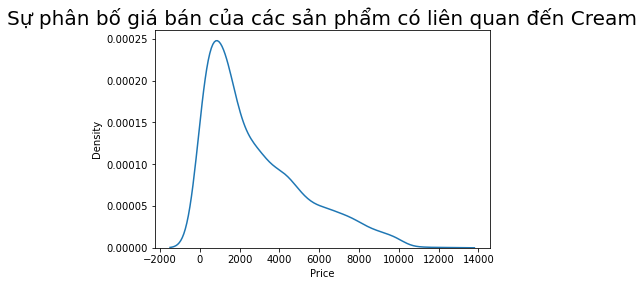

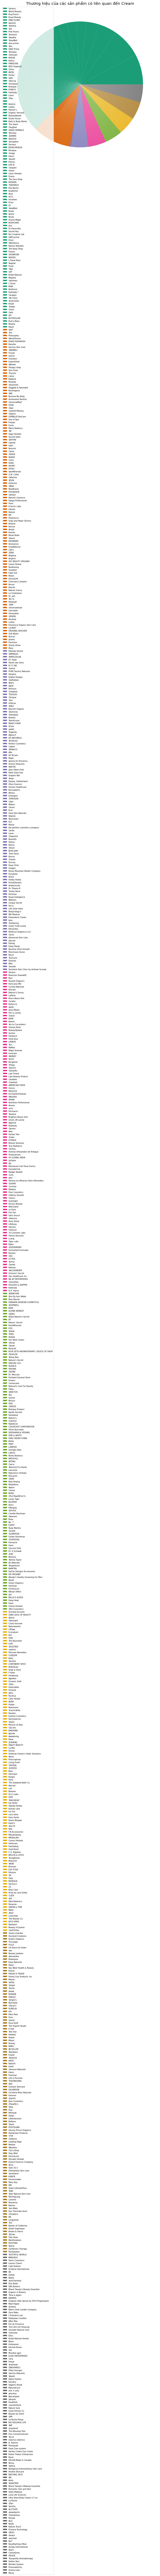

In [51]:
plot_category(df,'Skin Care',top=1000)

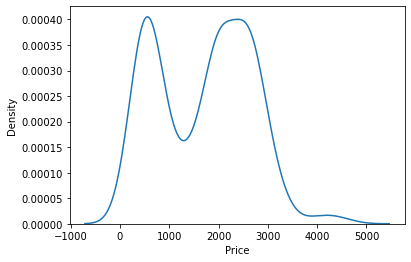

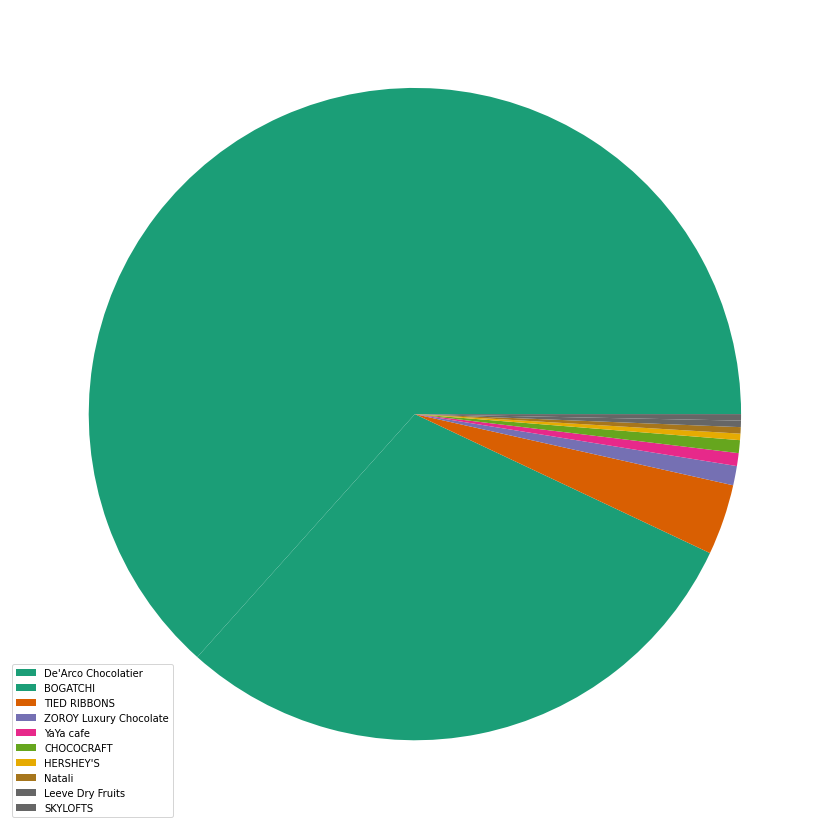

In [20]:
plot_category(df,'Grocery & Gourmet Foods',top=1000)

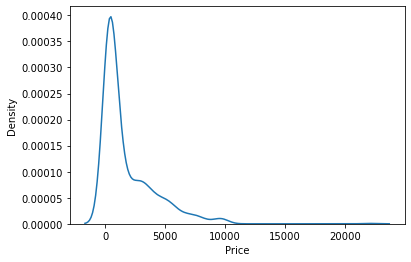

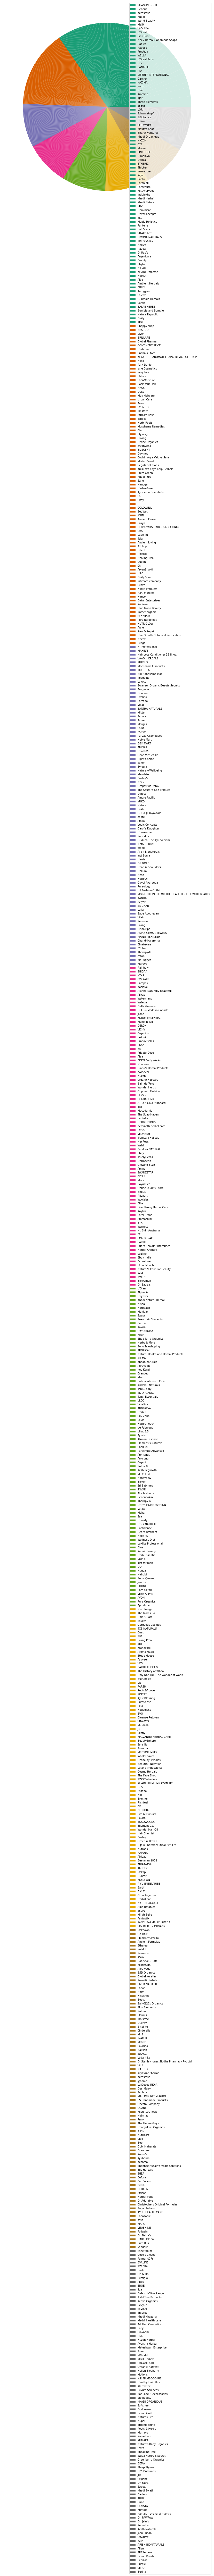

In [21]:
plot_category(df,'Hair Care',top=1000)

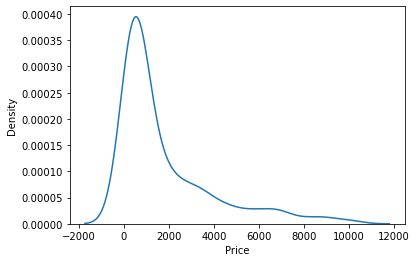

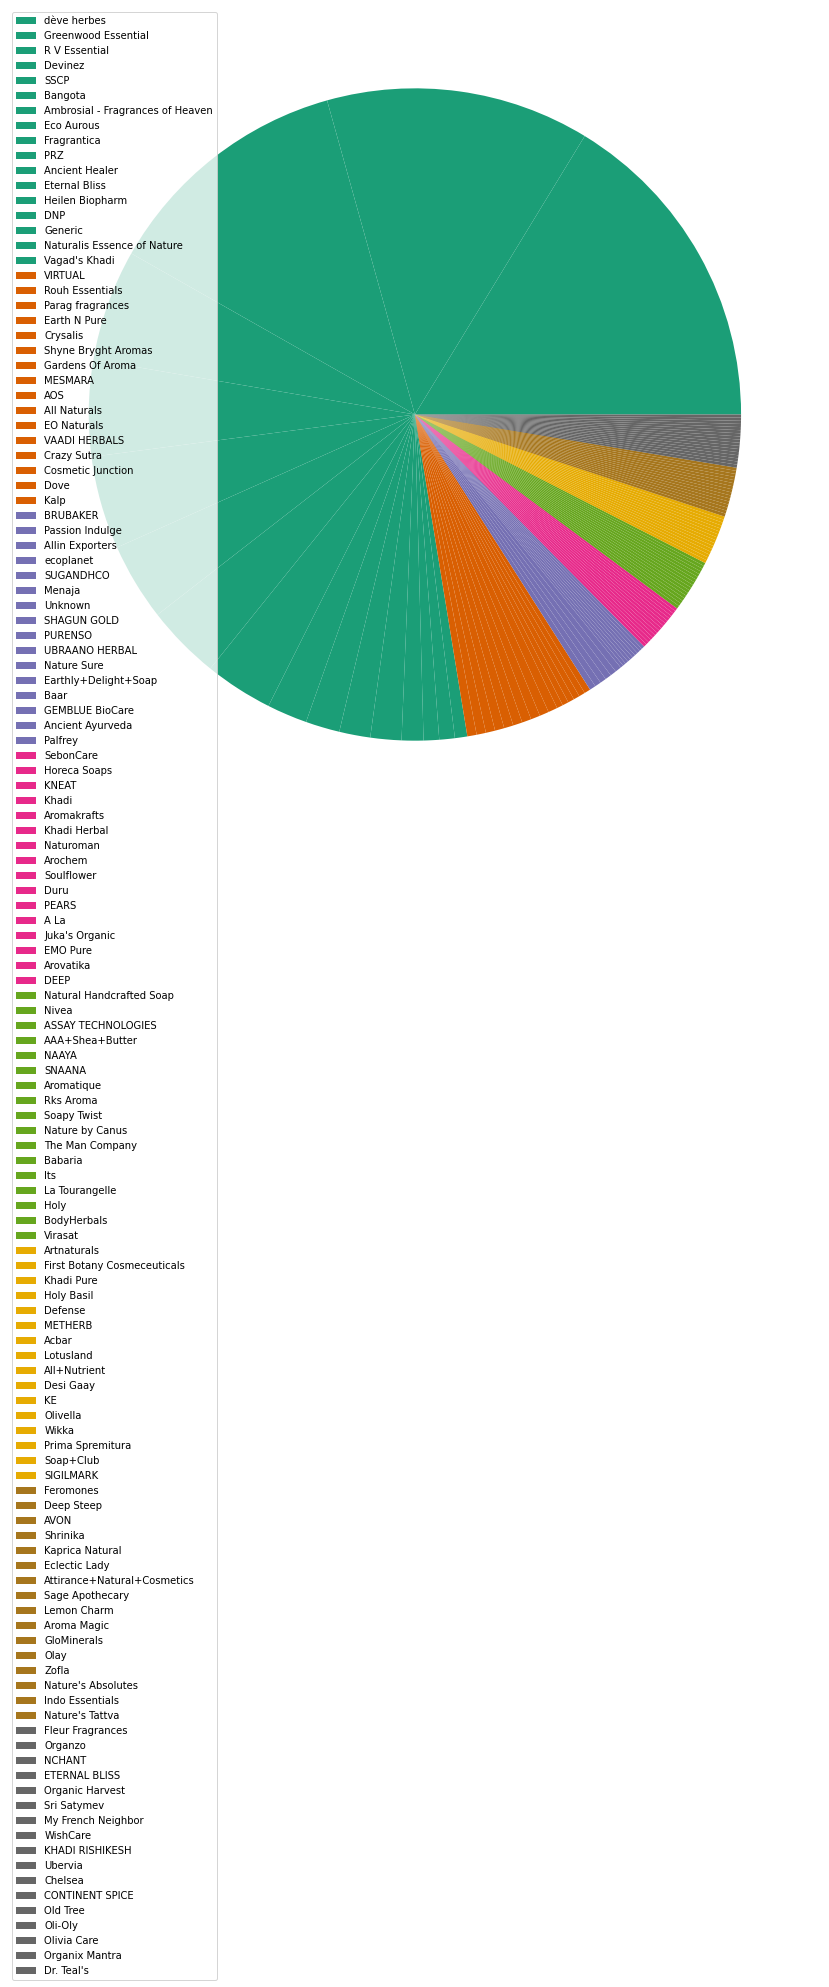

In [22]:
plot_category(df,'Bath & Shower',top=1000)

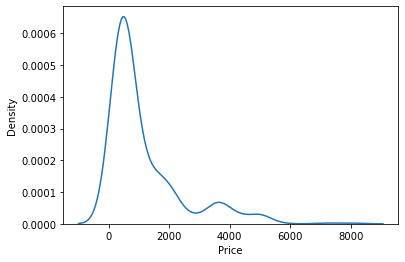

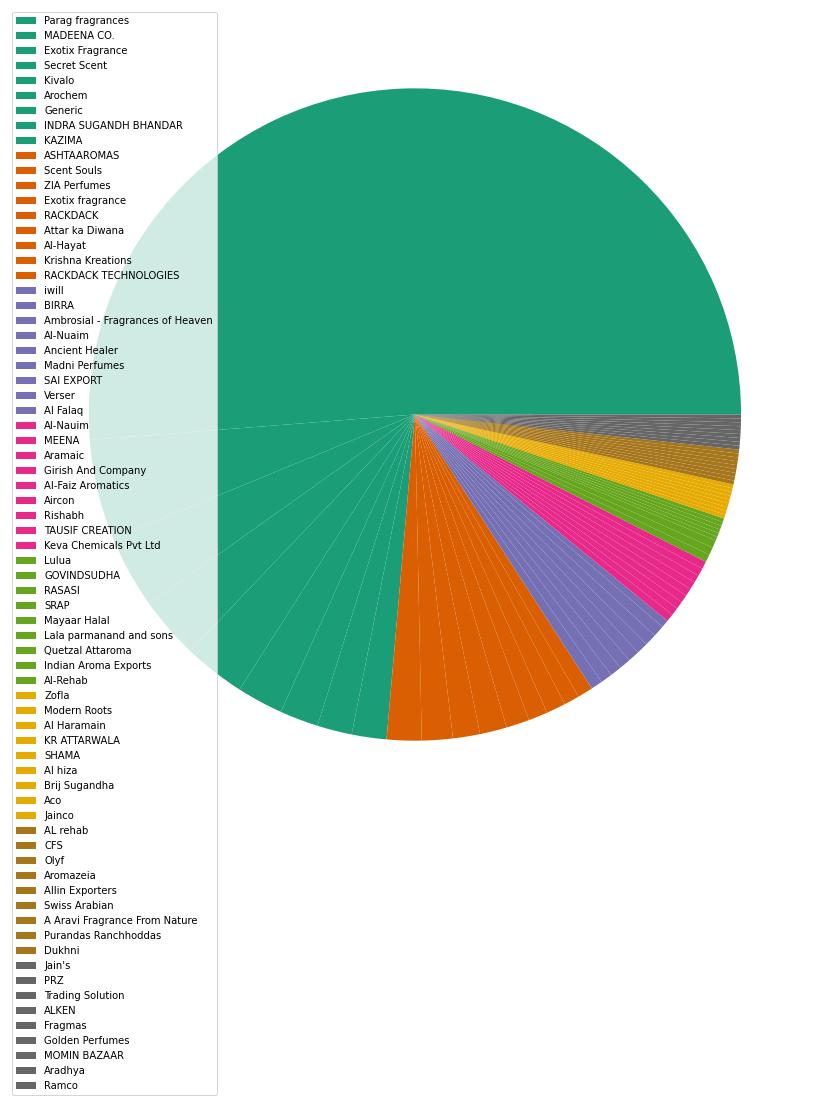

In [23]:
plot_category(df,'Fragrance',top=1000)

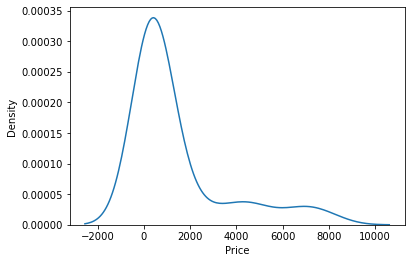

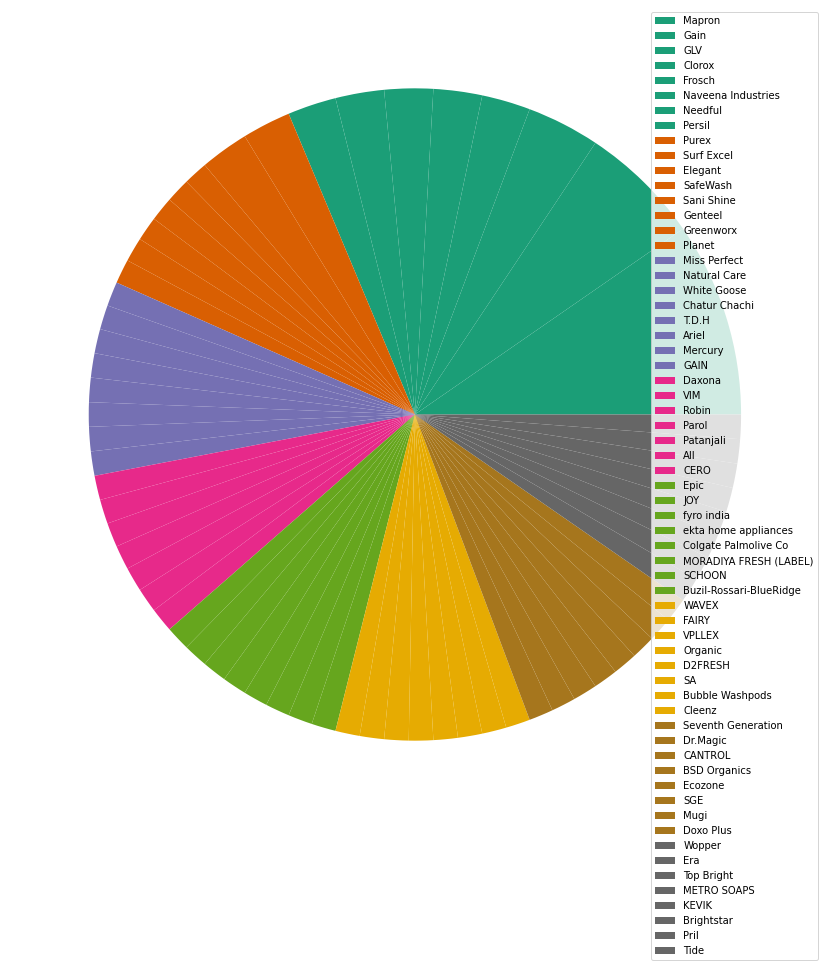

In [24]:
plot_category(df,'Detergents & Dishwash',top=1000)

## Nhìn lại

Qua đồ án này, em học được: 
- Cách sử dụng Git & Github: thành thạo các câu lệnh git add, git commit, git push và cách chia branch trong Git
- Học được các bước để phân tích dữ liệu từ tập dữ liệu có sẵn
Em cảm thấy 3 tuần là thời gian vừa đủ để hiểu dữ liệu, phân tích dữ liệu và đưa ra câu hỏi thực tế liên quan đến dữ liệu